In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144

# Exploratory Visualization
<!-- requirement: small_data/goog.json -->
<!-- requirement: small_data/temperatures.csv -->

One purpose of visualization is to help the analyst understand and model the data at hand. Exploratory visualization prioritizes speed over style, in contrast to explanatory visualization.

A few popular python packages are presented below, along with some boilerplate code and external references. 

The rest of the notebook focuses on interactive data exploration inside a Jupyter Notebook.

## Python visualization tools

* matplotlib (a [thorough rundown](http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/) of its potential)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/visualization.html) has its own useful plotting interface around matplotlib
* [seaborn](https://github.com/mwaskom/seaborn) (focuses on statistics, easier to customize than matplotlib)
* [bokeh](http://bokeh.pydata.org/en/latest/) (focus on interactivity, browser delivery)


## Describing a distribution
* Mean
* Median
* Variance
* Standard Deviation

Often statistical parameters provide important insight into the data - and can reveal information that is not visually obvious. However, it's important to consider their limitations as well and think about what is gained by visual exploration.

Outliers are a good place to start - visually they are easy to spot but they can have deceptive influence on statistical metrics. Consider [Anscombe's Quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet), a set of four distributions with nearly identical aggregate properties:

In [2]:
aq = sns.load_dataset("anscombe")

The *x* and *y* components of each set have similar means and standard deviations.

In [3]:
print aq[aq['dataset'] == 'I'].describe()
print aq[aq['dataset'] == 'II'].describe()

               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
min     4.000000   4.260000
25%     6.500000   6.315000
50%     9.000000   7.580000
75%    11.500000   8.570000
max    14.000000  10.840000
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000


For each dataset, the *x* and *y* components have nearly identical correlations.

In [4]:
for ds in ('I', 'II', 'III', 'IV'):
    print aq[aq['dataset'] == ds].corr().loc['x', 'y']

0.816420516345
0.816236506
0.81628673949
0.816521436889


So do the datasets represent the same relation?

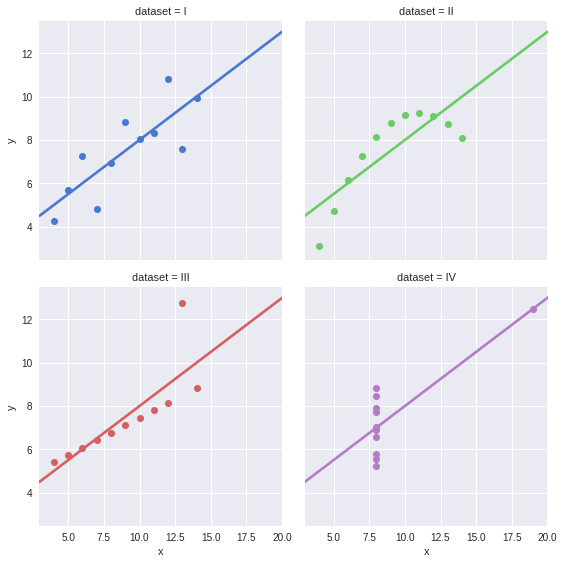

In [5]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=aq,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})

*Question*: When can situation 4 arise in real life? What can be done to identify this kind of situation in the feature space?

*Question*: You're told that the mean starting salary for a Data Scientist is \$110,000. What are two **non-visual** methods of determining whether the distribution is normal or bimodal (with many positions at ~\$140k and many at ~\$80k)?

## Histograms

In [6]:
tips = sns.load_dataset("tips")

In [7]:
print tips.shape
tips[:5]

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


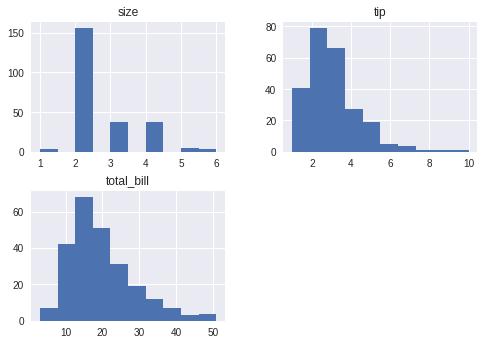

In [8]:
tips_hist = tips.hist()    #pandas hist() function. tips is a DataFrame

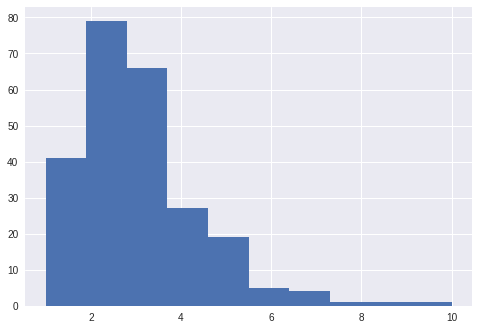

In [9]:
# Side note on saving figures to disk
# Won't work: tips_fig = tips_hist.get_figure()
tip_hist = tips['tip'].hist()
tips_fig = tip_hist.get_figure()

In [10]:
# these will work
# tips_fig.savefig('tiphist.png')
# tips_fig.savefig('tiphist.pdf')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c1baab950>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f6c1b6bb590>]], dtype=object)

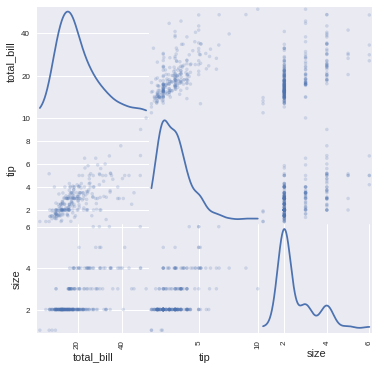

In [11]:
import pandas as pd
pd.plotting.scatter_matrix(tips, alpha=0.2, figsize=(6, 6), diagonal='kde')
# available in seaborn as pairplot()

### Further reading
For more information on kernel density estimation, check out these blog posts:
* [Michael Lerner's motivation of KDE based on histograms](http://www.mglerner.com/blog/?p=28)
* [A comparison of KDE methods in Python](https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/)

## Boxplots and Violin Plots

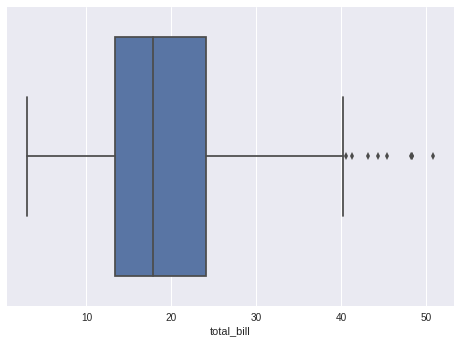

In [12]:
sns.boxplot(x='total_bill', data=tips)

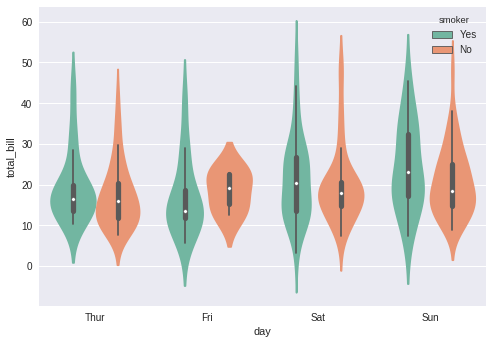

In [13]:
sns.violinplot(x="day", y="total_bill", hue="smoker", data=tips, palette="Set2")

You can see more examples in the API: 
http://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot

## Relationships between variables

### Linear correlation
The most common metric is [Pearson's](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) correlation coefficient (covariance normalized by the product of the standard deviations), which ranges between 1 being total positive correlation and -1 being total negative correlation.

In [14]:
tips.corr(method='pearson')

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


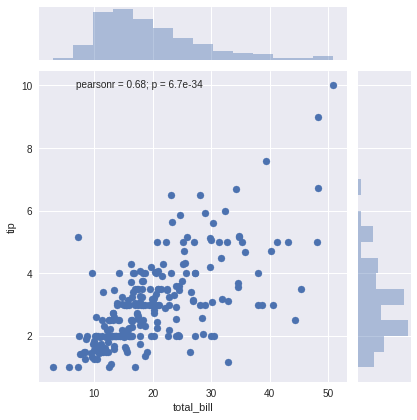

In [15]:
sns.jointplot(x='total_bill', y='tip', data=tips)

*Question*: Imagine you're trying to do some feature selection using Pearson's coefficient. What are two situations where this metric can be misleading?

### Indirect Influence / constraints
- e.g. speed is highly correlated with accidents only if driving on the highway
- This mostly boils down to intelligently looking at subsets of the data, edge cases, etc.
- Leave one out for predictive models

In [16]:
print tips['tip'].mean()
print tips[tips['size'] > 1]['tip'].mean()
print tips[tips['size'] == 1]['tip'].mean()

2.99827868852
3.02429166667
1.4375


*Question*: How meaningful is the above? What else do we need to consider?

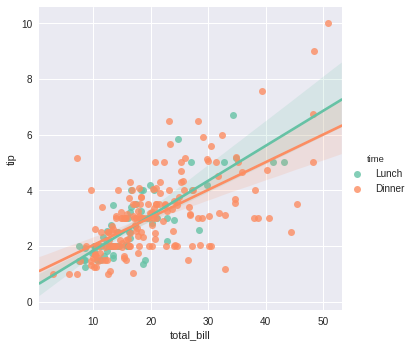

In [17]:
sns.lmplot(x='total_bill', y='tip', hue='time', data=tips, palette="Set2")

## Nonobvious patterns in the data
### Autocorrelation
Note: here, we focus on plotting this kind data. Details on time-series analysis are provided in module 3.

In [18]:
from pandas.plotting import autocorrelation_plot, lag_plot

In [19]:
# Get temperature data
temps_df = pd.read_csv("small_data/temperatures.csv", 
                       index_col=0,
                       names=["Temperature"],
                       parse_dates=True,
                       date_parser=lambda u: pd.datetime.strptime(u, "%Y-%m-%d %H:%M:%S"))

# get GOOG data
import simplejson as json

with open('small_data/goog.json') as raw_f:
    raw_data = raw_f.read()
    json_data = json.loads(raw_data)

json_data = json.loads(raw_data)
goog_df = pd.DataFrame(json_data['data'], columns=json_data['column_names'])

goog_open = goog_df['Open']

In [20]:
print goog_df.columns
print goog_df.head()

Index([u'Date', u'Open', u'High', u'Low', u'Close', u'Volume', u'Ex-Dividend',
       u'Split Ratio', u'Adj. Open', u'Adj. High', u'Adj. Low', u'Adj. Close',
       u'Adj. Volume'],
      dtype='object')
         Date    Open     High       Low   Close     Volume  Ex-Dividend  \
0  2015-10-09  640.00  645.990  635.3180  643.61  1637146.0          0.0   
1  2015-10-08  641.36  644.450  625.5600  639.16  2177943.0          0.0   
2  2015-10-07  649.24  650.609  632.1500  642.36  2084185.0          0.0   
3  2015-10-06  638.84  649.250  636.5295  645.44  2157007.0          0.0   
4  2015-10-05  632.00  643.010  627.0000  641.47  1761898.0          0.0   

   Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume  
0          1.0     640.00    645.990  635.3180      643.61    1637146.0  
1          1.0     641.36    644.450  625.5600      639.16    2177943.0  
2          1.0     649.24    650.609  632.1500      642.36    2084185.0  
3          1.0     638.84    649.250  636.5

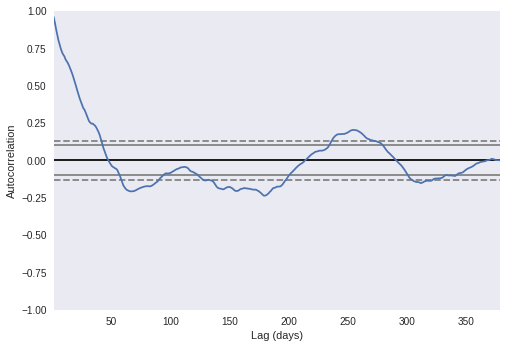

In [21]:
# autocorrelation is near 1 for short lags
autocorrelation_plot(goog_open)
matplotlib.pyplot.xlabel('Lag (days)')

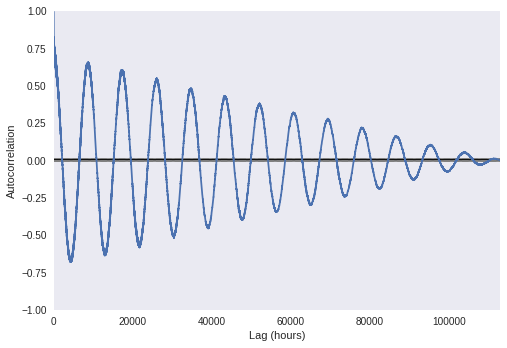

In [22]:
# seasonality is apparent in the temperature data
autocorrelation_plot(temps_df)
matplotlib.pyplot.xlabel('Lag (hours)')

### Using FFT to tease out trends in a time series

**Background notes on Fourier Analysis:**
Any periodic signal can be represented as the sum of a number of sine waves with varying amplitude, phase, and frequency.

A time series can be convered into its frequency components with the mathematical tool known as the Fourier transform. As we are dealing with sampled data, we must use the discrete version. The common algorithm for computing discrete transforms in the fast Fourier transform, usually abbreviated FFT.

The **output of a FFT can be thought of as a representation of all the frequency components of your data**. In some sense it is a histogram with each “frequency bin” corresponding to a particular frequency in your signal. 

In [23]:
# here is a simple example to illustrate FFT
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

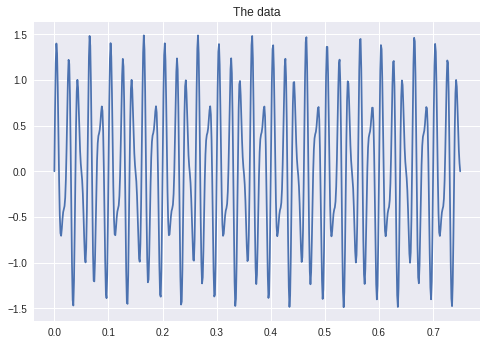

In [24]:
# the data
N = 600
T = 1.0 / 800.0

x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0 * np.pi * x) + 0.5*np.sin(80.0 * 2.0 * np.pi * x)

plt.plot(x, y)
plt.title("The data");

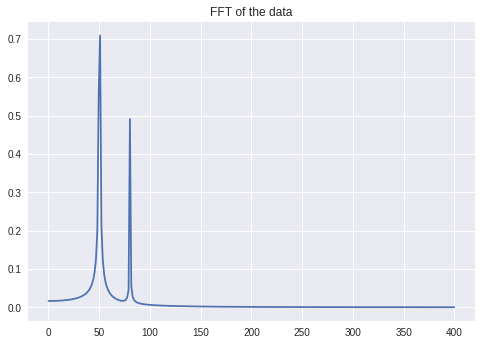

In [25]:
# FFT of the data
# (usually, you subtract the mean before performing FFT...)
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N/2]))
plt.title("FFT of the data")
plt.show();

(In words, explain how the FFT plot relates to the plot of the data.)

## Interactivity in visualizations
This module should be useful for those of you wishing to incorporate interactivity into Jupyter notebook visualizations. We will go through some examples in Bokeh but the same ideas apply to matplotlib.

## When to use Jupyter notebooks
In contrast to techniques using D3, which tend to be focused on polished, *explanatory* visualizations for the end-user, Jupyter notebooks tend to be more useful for *exploration*. This is the time when running code modularly is useful because you're interested in the effect of changing a few lines of code without rerunning the entire script. We already discussed the rationale behind including visualization as part of your data exploration, and interactivity is a powerful tool to accomplish that objective, whether it's just you, or your team huddled around your computer.

Let's start with the same old time series data.

In [26]:
import pandas as pd
import numpy as np

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.palettes import Spectral6
from ipywidgets import *
import requests
import ujson as json

In [27]:
output_notebook()  # output bokeh plots in ipynb
TOOLS = "pan, box_zoom, wheel_zoom, reset, save"

with open('small_data/goog.json') as raw_f:
    raw_data = raw_f.read()
    json_data = json.loads(raw_data)
    
df = pd.DataFrame(json_data['data'], columns=json_data['column_names'])
df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)

Loading BokehJS ...

## Layering information
While it is possible to include additional axes of data using color, thickness, texture, etc., it can be beneficial to use interactivity for this purpose.
* Gives the end user control, gets them engaged with the data.
* Allows for the base graph to be less cluttered and send a clearer message.
* "Feels" impressive. Interactive graphs make you feel like there's a vast amount of data which you're tapping into.

Most web-deployed interactive plots (or dashboards, as people like to call them) run on D3. You give these tools a large data source server-side, and the JavaScript can rapidly render the desired slice of the data. For polished tools, look at Bokeh server, Pyxley, or highcharts.

While it is possible to request new data as a function of a choice made by the end user, the bandwidth required to do this scales with how responsive you want the display to be and how detailed the data is. This is currently an area of active technology development.

A basic technique for adding interactivity to IPython notebooks is HTML widgets.

In [28]:
def update(start=0, end=len(df), col='Close'):
    remove_from_tail = start
    remove_from_head = len(df) - end
    days = len(df)
    plot = figure(tools=TOOLS, title="Title", x_axis_label="date", x_axis_type="datetime")
    plot.line(df[col].index[days-end:days-start], df[col][days-end:days-start])
    show(plot)

In [29]:
interact(update, start=(0,len(df)-1), end=(1,len(df)), col=['Open', 'High', 'Low', 'Close', 'Volume'])

interactive(children=(IntSlider(value=0, description=u'start', max=378), IntSlider(value=379, description=u'end', max=379, min=1), Dropdown(description=u'col', index=3, options=('Open', 'High', 'Low', 'Close', 'Volume'), value='Close'), Output()), _dom_classes=('widget-interact',))

<function __main__.update>

*Exercise*: Change the update function so that it always plots a month of data, and the slider moves the window back and forth in time.

Now that you know how to do the basics, let's get a little fancier and overlay two stocks of the user's choice.

In [30]:
def get_url(ticker):
    return 'https://www.quandl.com/api/v3/datasets/WIKI/%s.json' % ticker.upper()
    
def get_data(ticker):
    session = requests.Session()
    session.mount('http://', requests.adapters.HTTPAdapter(max_retries=2))
    raw_data = session.get(get_url(ticker)).content
    json_data = json.loads(raw_data)['dataset']
    return pd.DataFrame(json_data['data'], columns=json_data['column_names'])

def update2(col='Volume', lag=20, ticker1='INTC', ticker2='AAPL'):
    tickers = [ticker1, ticker2]

    colorwheel = Spectral6
    color_idx = 0
    plot = figure(tools=TOOLS, title="Better Title", x_axis_label="date", x_axis_type="datetime")
    
    for ticker in tickers:
        try:
            if ticker not in dfs:
                dfs[ticker] = get_data(ticker)

                dfs[ticker].set_index(pd.DatetimeIndex(dfs[ticker]['Date']), inplace=True)
            df = dfs[ticker][:lag]
            plot.line(df[col].index, df[col], line_color=colorwheel[color_idx], line_width=2, legend=ticker)
            color_idx += 1
            if color_idx > len(colorwheel):
                color_idx = 0
        except KeyError:
            print("Invalid Key for {} or broken connection".format(ticker.upper()))
    show(plot)

dfs = {}

In [31]:
interact(update2, col=['Open', 'High', 'Low', 'Close', 'Volume'], lag=(5,360,5), ticker1='intc', ticker2='aapl')

interactive(children=(Dropdown(description=u'col', index=4, options=('Open', 'High', 'Low', 'Close', 'Volume'), value='Volume'), IntSlider(value=20, description=u'lag', max=360, min=5, step=5), Text(value=u'intc', description=u'ticker1'), Text(value=u'aapl', description=u'ticker2'), Output()), _dom_classes=('widget-interact',))

<function __main__.update2>

### Next stop, Google Finance!

There's other ways of using Bokeh interactively in notebooks as well such as `push_notebook()`. See the [documentation](http://bokeh.pydata.org/en/latest/docs/user_guide/notebook.html).

## Being creative
Don't be limited here - interactivity can affect not just data slicing but also the underlying source data, plot type, and more. You might even be able to cater to people viewing your chart on different devices.

For more ideas, styling, functionality, and examples, see [the documentation](http://nbviewer.ipython.org/github/quantopian/ipython/blob/master/examples/Interactive%20Widgets/Index.ipynb).

## Answering the second and third question

One of the great strengths of interactivity is the ability to conduct an entire discussion with your audience instead of just presenting them a static view of what you think they'll be interested in. The time sliders in the above example are nice, but most of the functionality comes from being able to select different columns (data at different scales) in the same time window and compare.

Exercise spoilers...

### Answers
1. Categorical features with low representation
1. Quantiles, kurtosis, various statistical tests
1. Distributions like Anscombe's quartet, nonlinear relationships
1. Sample size

In [32]:
def update(start=0, col='Close'):
    days = len(df)
    plot = figure(tools=TOOLS, title="Title", x_axis_label="date", x_axis_type="datetime")
    plot.line(df[col].index[days-start-20:days-start], df[col][days-start-20:days-start])
    show(plot)

In [33]:
interact(update, start=(0,len(df)-20), col=['Open', 'High', 'Low', 'Close', 'Volume'])

interactive(children=(IntSlider(value=0, description=u'start', max=359), Dropdown(description=u'col', index=3, options=('Open', 'High', 'Low', 'Close', 'Volume'), value='Close'), Output()), _dom_classes=('widget-interact',))

<function __main__.update>

*Copyright &copy; 2015 The Data Incubator.  All rights reserved.*